# WeatherPy
----
## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# import dependencies & libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# api key for Open Weather
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


In [3]:
# test response to parse json
base_url = "https://api.openweathermap.org/data/2.5/weather?"
target_city = "London"

city_url = f"{base_url}q={target_city}&units=Metric&appid={weather_api_key}"

response = requests.get(city_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 51.5085,
        "lon": -0.1257
    },
    "dt": 1697139466,
    "id": 2643743,
    "main": {
        "feels_like": 15.59,
        "humidity": 94,
        "pressure": 1012,
        "temp": 15.53,
        "temp_max": 17.42,
        "temp_min": 13.21
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 2006068,
        "sunrise": 1697091507,
        "sunset": 1697130924,
        "type": 2
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 170,
        "speed": 1.54
    }
}


In [4]:
# test to parse json
lat = response["coord"]["lat"]
lon = response["coord"]["lon"]
max_temp = response["main"]["temp_max"]
humidity = response["main"]["humidity"]
clouds = response["clouds"]["all"]
wind = response["wind"]["speed"]
country = response["sys"]["country"]
date = response["dt"]
print(lat)
print(lon)
print(max_temp)
print(humidity)
print(clouds)
print(wind)
print(country)
print(date)

51.5085
-0.1257
17.42
94
100
1.54
GB
1697139466


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# set API base url
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&units=Metric&appid={weather_api_key}"
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san isidro
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | arkhangel'sk
Processing Record 4 of Set 1 | lesnoy
Processing Record 5 of Set 1 | barcelos
Processing Record 6 of Set 1 | westerland
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 10 of Set 1 | yeniseysk
Processing Record 11 of Set 1 | youssoufia
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | puerto deseado
Processing Record 15 of Set 1 | berdigestyakh
Processing Record 16 of Set 1 | villa gesell
Processing Record 17 of Set 1 | quepos
Processing Record 18 of Set 1 | castillos
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | kruisfontein
Processing Record 21 of Set 1 | ge

City not found. Skipping...
Processing Record 39 of Set 4 | badiyah
Processing Record 40 of Set 4 | luninyets
Processing Record 41 of Set 4 | gatton
Processing Record 42 of Set 4 | utrik
Processing Record 43 of Set 4 | vorgashor
Processing Record 44 of Set 4 | bobrov
Processing Record 45 of Set 4 | alakurtti
Processing Record 46 of Set 4 | namibe
Processing Record 47 of Set 4 | istgah-e rah ahan-e garmsar
Processing Record 48 of Set 4 | colonia
Processing Record 49 of Set 4 | tobi village
City not found. Skipping...
Processing Record 0 of Set 5 | envira
Processing Record 1 of Set 5 | fort bragg
Processing Record 2 of Set 5 | pizarro
Processing Record 3 of Set 5 | tsarevo
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | labrador city
Processing Record 6 of Set 5 | taroa
Processing Record 7 of Set 5 | tamanrasset
Processing Record 8 of Set 5 | kayangel
Processing Record 9 of Set 5 | new norfolk
Processing Record 10 of Set 5 | pacasmayo
Processing Record 11 of Se

Processing Record 31 of Set 8 | kilju
Processing Record 32 of Set 8 | kargasok
Processing Record 33 of Set 8 | fomboni
Processing Record 34 of Set 8 | songyuan
Processing Record 35 of Set 8 | cambria
Processing Record 36 of Set 8 | hailar
Processing Record 37 of Set 8 | arba minch
Processing Record 38 of Set 8 | port glaud
City not found. Skipping...
Processing Record 39 of Set 8 | boyolangu
Processing Record 40 of Set 8 | hobyo
Processing Record 41 of Set 8 | cantilan
Processing Record 42 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 43 of Set 8 | danjiangkou
Processing Record 44 of Set 8 | yeppoon city centre
City not found. Skipping...
Processing Record 45 of Set 8 | thala
Processing Record 46 of Set 8 | vilyuysk
Processing Record 47 of Set 8 | dikwa
Processing Record 48 of Set 8 | chulakkurgan
Processing Record 49 of Set 8 | kormilovka
Processing Record 0 of Set 9 | aldinga beach
Processing Record 1 of Set 9 | crane
Processing Record 2 of Set 9 | carauari
Proc

Processing Record 18 of Set 12 | luba
Processing Record 19 of Set 12 | chulym
Processing Record 20 of Set 12 | ceeldheer
Processing Record 21 of Set 12 | luoyang
Processing Record 22 of Set 12 | las veredas
Processing Record 23 of Set 12 | garhwa
Processing Record 24 of Set 12 | uliastay
Processing Record 25 of Set 12 | hoquiam
Processing Record 26 of Set 12 | le port
Processing Record 27 of Set 12 | gizo
Processing Record 28 of Set 12 | kuta
Processing Record 29 of Set 12 | valparaiso
Processing Record 30 of Set 12 | santa luzia
Processing Record 31 of Set 12 | happy valley-goose bay
Processing Record 32 of Set 12 | rundu
Processing Record 33 of Set 12 | dali
Processing Record 34 of Set 12 | valdivia
Processing Record 35 of Set 12 | cooma
Processing Record 36 of Set 12 | leona vicario
Processing Record 37 of Set 12 | funafuti
Processing Record 38 of Set 12 | hankasalmi
Processing Record 39 of Set 12 | sos'va
Processing Record 40 of Set 12 | ancud
Processing Record 41 of Set 12 | atar


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san isidro,-12.1167,-77.0500,19.77,73,75,4.63,PE,1697139714
1,port-aux-francais,-49.3500,70.2167,2.10,78,82,7.10,TF,1697139715
2,arkhangel'sk,64.5401,40.5433,7.85,92,65,4.41,RU,1697139715
3,lesnoy,57.6198,63.0784,2.16,93,100,7.38,RU,1697139715
4,barcelos,41.5388,-8.6151,24.95,51,100,1.89,PT,1697139716


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san isidro,-12.1167,-77.0500,19.77,73,75,4.63,PE,1697139714
1,port-aux-francais,-49.3500,70.2167,2.10,78,82,7.10,TF,1697139715
2,arkhangel'sk,64.5401,40.5433,7.85,92,65,4.41,RU,1697139715
3,lesnoy,57.6198,63.0784,2.16,93,100,7.38,RU,1697139715
4,barcelos,41.5388,-8.6151,24.95,51,100,1.89,PT,1697139716


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

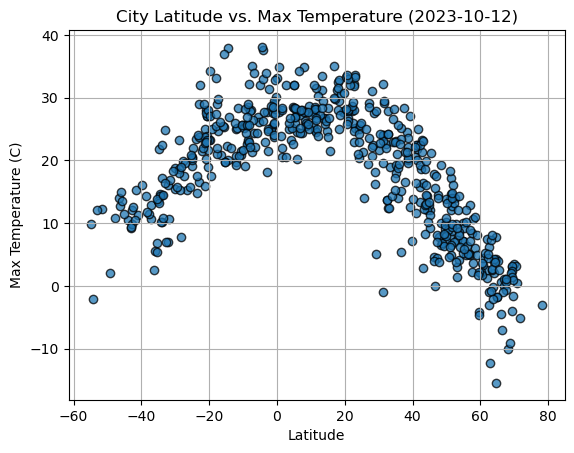

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-10-12)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

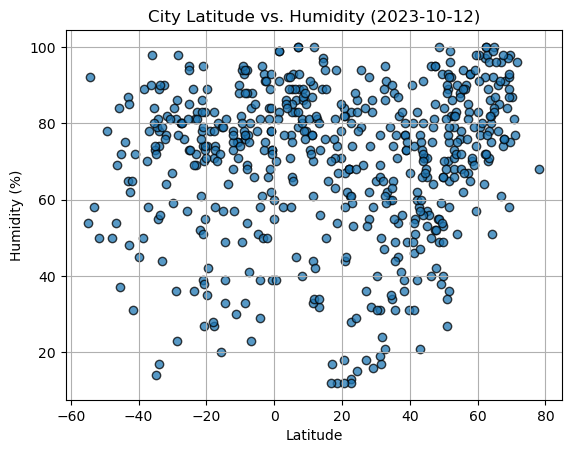

In [11]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-10-12)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

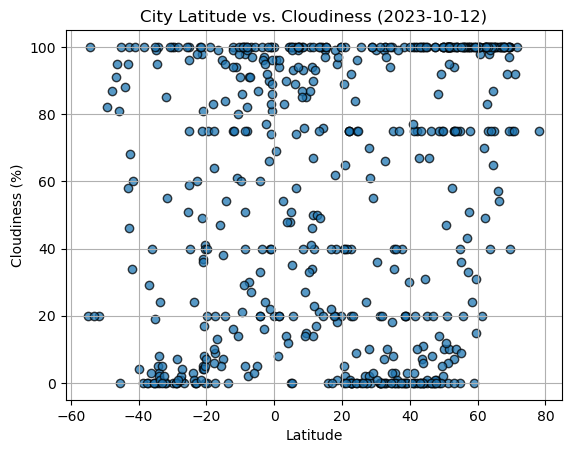

In [12]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-10-12)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude Vs. Wind Speed

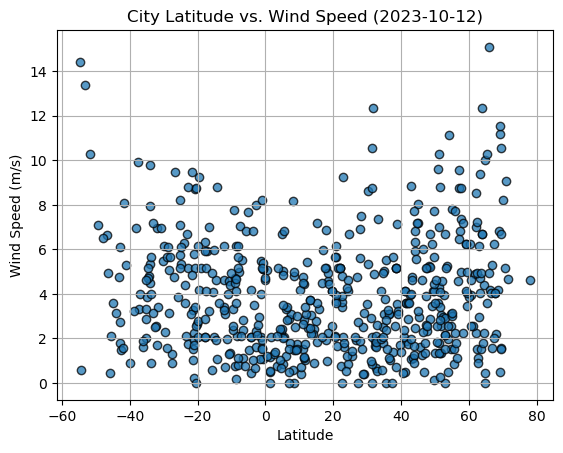

In [13]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-10-12)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

----
## Requirement 2: Compute Linear Regression for Each Relationship

In [14]:
# Define a function to create Linear Regression plots
# define function with arguments (x, y, ylabel, location of line_eq)
def linregressplot(x_values, y_values, y_label, eq_loc):
    # use linregress function to get values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # use values to create line
    regress_values = x_values * slope + intercept
    # print r-value
    print(f"The r-value is: {rvalue**2}")

    # equation to annotate
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # plot scatter + line + annotation
    plt.scatter(x_values,y_values, edgecolors='black', alpha=0.75)
    plt.title(f'City Latitude vs. {y_label} (2023-10-12)')
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(eq_loc),fontsize=15,color="red")
    plt.grid()
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,arkhangel'sk,64.5401,40.5433,7.85,92,65,4.41,RU,1697139715
3,lesnoy,57.6198,63.0784,2.16,93,100,7.38,RU,1697139715
4,barcelos,41.5388,-8.6151,24.95,51,100,1.89,PT,1697139716
5,westerland,54.9079,8.3033,9.96,76,40,2.57,DE,1697139716
7,yeniseysk,58.4497,92.1703,6.08,70,100,2.24,RU,1697139717


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san isidro,-12.1167,-77.0500,19.77,73,75,4.63,PE,1697139714
1,port-aux-francais,-49.3500,70.2167,2.10,78,82,7.10,TF,1697139715
6,margaret river,-33.9500,115.0667,10.19,89,8,4.51,AU,1697139489
10,papatowai,-46.5619,169.4708,14.00,54,91,6.64,NZ,1697139718
11,puerto deseado,-47.7503,-65.8938,10.78,50,87,6.51,AR,1697139718


### Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7627401591819709


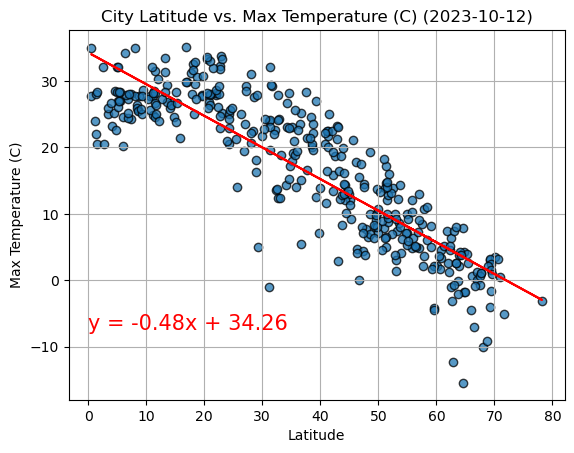

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
y_label = "Max Temperature (C)"
eq_loc = (0, -7.5)

linregressplot(x_values, y_values, y_label, eq_loc)

The r-value is: 0.619228372469936


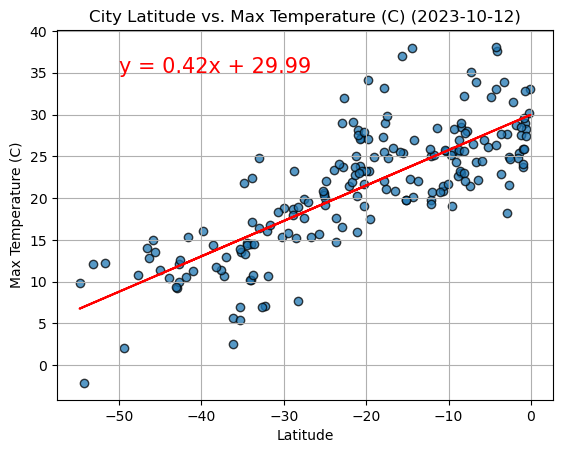

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
y_label = "Max Temperature (C)"
eq_loc = (-50, 35)

linregressplot(x_values, y_values, y_label, eq_loc)

**Discussion about the linear relationship:** These r values tell us that there appears to be a moderate to strong relationship between a city's latitude and its maximum temperature. The closer a city is to Latitude 0, the higher its maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.022637846320507662


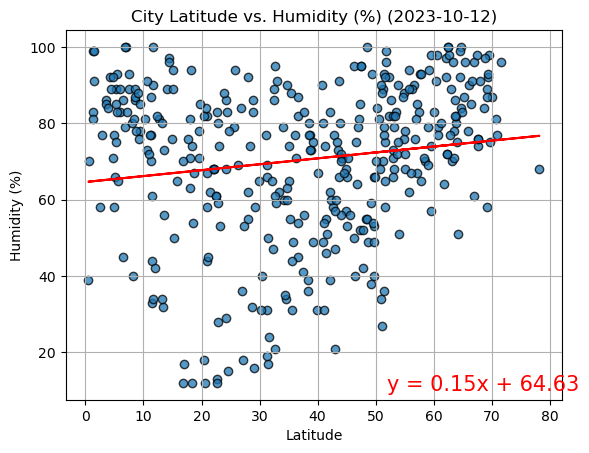

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
y_label = "Humidity (%)"
eq_loc = (52, 10)

linregressplot(x_values, y_values, y_label, eq_loc)

The r-value is: 0.004173716134404432


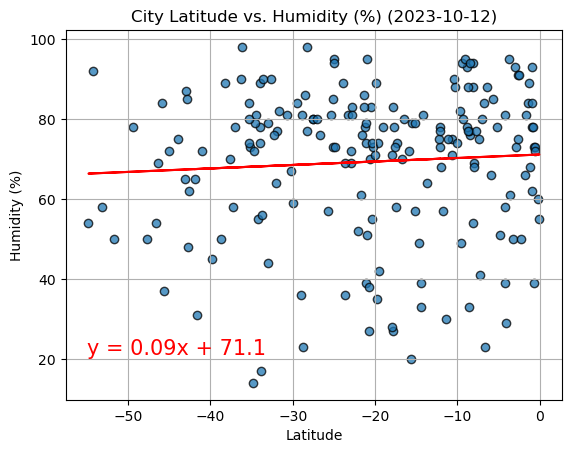

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
y_label = "Humidity (%)"
eq_loc = (-55,21)

linregressplot(x_values, y_values, y_label, eq_loc)

**Discussion about the linear relationship:** The r values for both graphs suggest that there is close to no relationship between a city's latitude and its humidity. The correlation appears slightly higher for the northern hemisphere, but the r value is not even that of a moderately strong correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.033459520479452026


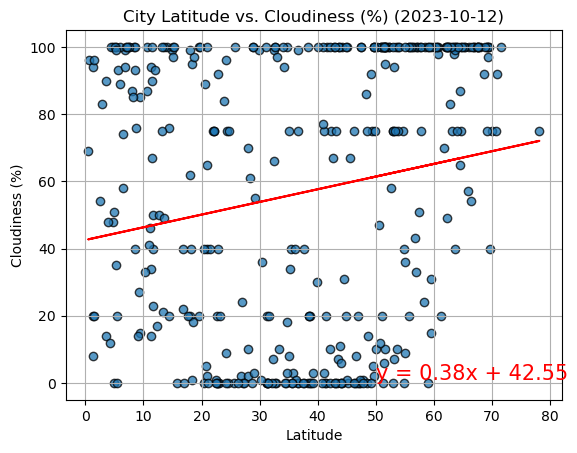

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
y_label = "Cloudiness (%)"
eq_loc = (50,1)

linregressplot(x_values, y_values, y_label, eq_loc)

The r-value is: 0.04431165326378684


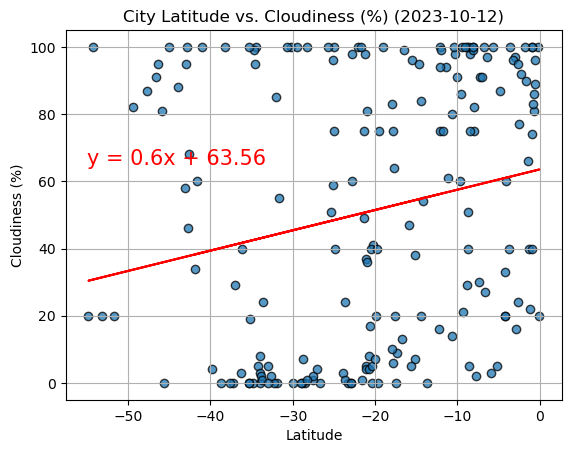

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
y_label = "Cloudiness (%)"
eq_loc = (-55,65)

linregressplot(x_values, y_values, y_label, eq_loc)

**Discussion about the linear relationship:** The r values for both graphs suggest that there does not appear to be a correlation between a city's latitude versus its cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08561795897541347


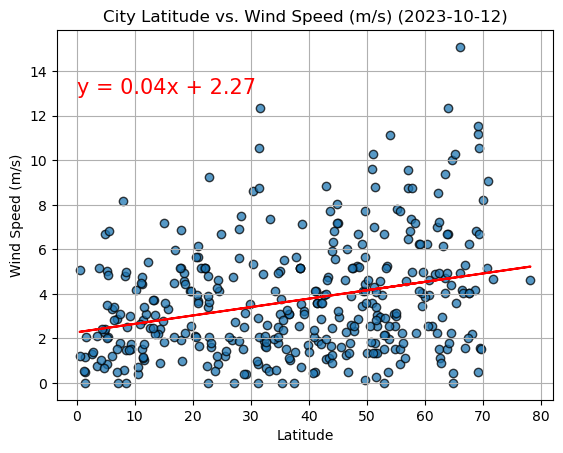

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
y_label = "Wind Speed (m/s)"
eq_loc = (0, 13)

linregressplot(x_values, y_values, y_label, eq_loc)

The r-value is: 0.05241361651332234


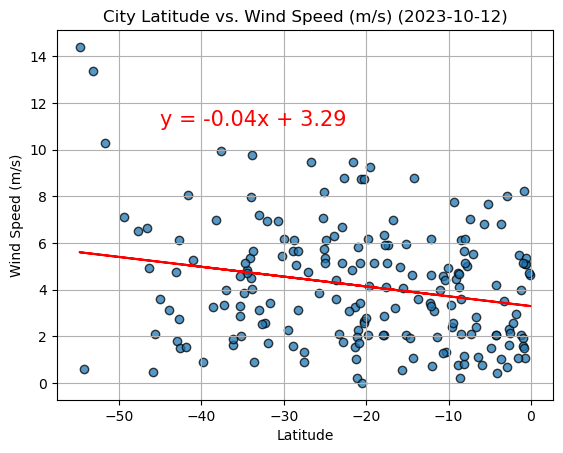

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
y_label = "Wind Speed (m/s)"
eq_loc = (-45, 11)

linregressplot(x_values, y_values, y_label, eq_loc)

**Discussion about the linear relationship:** There appears to be a correlation between a city's latitude and its wind speed. It appears that the closer a city is to Latitude 0, the slower overall its wind speeds. The r value for both graphs is around 0.6, which translates to a moderate positive relationship.